In [2]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
from pylab import rcParams
print(os.listdir("../20180611_net11_speed0.01"))
print(os.listdir("../20180611_net11_speed0.02"))
print(os.listdir("../20180611_net11_speed0.1"))

['blocked_205_b.csv', '.DS_Store', 'ssrr_lno_output.txt', 'ssrr_lno.lp', 'input_demands2.txt', 'ssr_lno_output.txt', 'input_demands1.txt', 'operation_num.csv', 'blocked_205_b.txt', 'ssr_lno.lp', 'ssr_lno_result.txt', 'ssr_lno_running.txt', 'ssrr_lno_result.txt']
['blocked_205_b.csv', '.DS_Store', 'ssrr_lno_output.txt', 'ssrr_lno.lp', 'input_demands2.txt', 'ssr_lno_output.txt', 'input_demands1.txt', 'operation_num.csv', 'blocked_205_b.txt', 'ssr_lno.lp', 'ssr_lno_result.txt', 'ssr_lno_running.txt', 'ssrr_lno_result.txt']
['blocked_205_b.csv', '.DS_Store', 'ssrr_lno_output.txt', 'ssrr_lno.lp', 'input_demands2.txt', 'ssr_lno_output.txt', 'input_demands1.txt', 'operation_num.csv', 'blocked_205_b.txt', 'ssr_lno.lp', 'ssr_lno_result.txt', 'ssr_lno_running.txt', 'ssrr_lno_result.txt']


In [8]:
df_blocking_001 = pd.read_csv('../20180611_net11_speed0.01/blocked_205_b.csv', names = ('load', 'speed', 'Without defragmentation', 'Conventional', 'Proposed', 'Conventional with SSR-LNO', 'Proposed with SSRR-LNO') )
df_blocking_002 = pd.read_csv('../20180611_net11_speed0.02/blocked_205_b.csv', names = ('load', 'speed', 'Without defragmentation', 'Conventional', 'Proposed', 'Conventional with SSR-LNO', 'Proposed with SSRR-LNO') )
df_blocking_01 = pd.read_csv('../20180611_net11_speed0.1/blocked_205_b.csv', names = ('load', 'speed', 'Without defragmentation', 'Conventional', 'Proposed', 'Conventional with SSR-LNO', 'Proposed with SSRR-LNO') )

In [10]:
df_blocking_001 = df_blocking_001[(df_blocking_001['speed'] == 0.01)]
df_blocking_002 = df_blocking_002[(df_blocking_002['speed'] == 0.01)]
df_blocking_01 = df_blocking_01[(df_blocking_01['speed'] == 0.01)]

In [11]:
df_blocking_002

,load,speed,Without defragmentation,Conventional,Proposed,Conventional with SSR-LNO,Proposed with SSRR-LNO
0,50,0.01,0,0,95,0,0
4,60,0.01,11,0,95,0,0
8,70,0.01,85,0,95,0,0
12,80,0.01,279,15,112,0,0
16,90,0.01,545,96,187,0,0
20,100,0.01,864,251,362,0,0
24,110,0.01,1110,486,589,0,0
28,120,0.01,1384,744,826,0,0
32,130,0.01,1652,998,1104,0,0
36,140,0.01,1892,1272,1355,0,0


In [12]:
for index, row in df_blocking_001.iterrows():
    df_blocking_001.loc[index, 'Without defragmentation':'Proposed with SSRR-LNO'] /= [10000, 10000, 10000, 10000, 10000]
for index, row in df_blocking_002.iterrows():
    df_blocking_002.loc[index, 'Without defragmentation':'Proposed with SSRR-LNO'] /= [10000, 10000, 10000, 10000, 10000]
for index, row in df_blocking_01.iterrows():
    df_blocking_01.loc[index, 'Without defragmentation':'Proposed with SSRR-LNO'] /= [10000, 10000, 10000, 10000, 10000]

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [13]:
df_blocking_002

,load,speed,Without defragmentation,Conventional,Proposed,Conventional with SSR-LNO,Proposed with SSRR-LNO
0,50,0.01,0.0000,0.0000,0.0095,0.0,0.0
4,60,0.01,0.0011,0.0000,0.0095,0.0,0.0
8,70,0.01,0.0085,0.0000,0.0095,0.0,0.0
12,80,0.01,0.0279,0.0015,0.0112,0.0,0.0
16,90,0.01,0.0545,0.0096,0.0187,0.0,0.0
20,100,0.01,0.0864,0.0251,0.0362,0.0,0.0
24,110,0.01,0.1110,0.0486,0.0589,0.0,0.0
28,120,0.01,0.1384,0.0744,0.0826,0.0,0.0
32,130,0.01,0.1652,0.0998,0.1104,0.0,0.0
36,140,0.01,0.1892,0.1272,0.1355,0.0,0.0


In [14]:
plt.rcParams['figure.figsize'] = 10,8
plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['font.family'] ='Times New Roman'#使用するフォント
plt.rcParams['font.size'] = 28 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 1.0# 軸の線幅edge linewidth。囲みの太さ

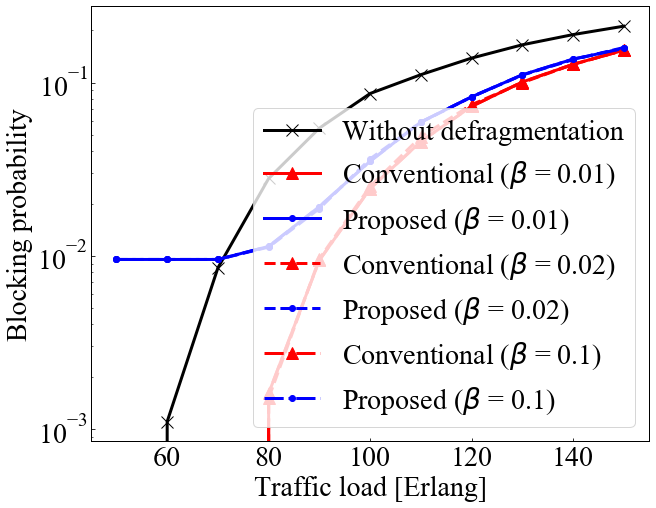

In [17]:
plt.yscale("log")
plt.plot(df_blocking_002['load'], df_blocking_002['Without defragmentation'], marker='x', markersize=12,  color="black", linewidth=3)

plt.plot(df_blocking_001['load'], df_blocking_001['Conventional'], label=('Conventional (' + r'$\beta$' + ' = 0.01)'), marker='^', markersize=12,  color="red", linewidth=3)
plt.plot(df_blocking_001['load'], df_blocking_001['Proposed'], label=('Proposed (' + r'$\beta$' + ' = 0.01)'), marker='.', markersize=12,  color="blue", linewidth=3)

plt.plot(df_blocking_002['load'], df_blocking_002['Conventional'], label=('Conventional (' + r'$\beta$' + ' = 0.02)'), marker='^', markersize=12,  color="red", linewidth=3, linestyle='--')
plt.plot(df_blocking_002['load'], df_blocking_002['Proposed'], label=('Proposed (' + r'$\beta$' + ' = 0.02)'), marker='.', markersize=12,  color="blue", linewidth=3, linestyle='--')

plt.plot(df_blocking_01['load'], df_blocking_001['Conventional'], label=('Conventional (' + r'$\beta$' + ' = 0.1)'), marker='^', markersize=12,  color="red", linewidth=3, linestyle='-.')
plt.plot(df_blocking_01['load'], df_blocking_001['Proposed'], label=('Proposed (' + r'$\beta$' + ' = 0.1)'), marker='.', markersize=12,  color="blue", linewidth=3, linestyle='-.')
plt.xlabel("Traffic load [Erlang]") # x軸のタイトル
plt.ylabel("Blocking probability") # y軸
plt.legend()
# plt.savefig("../speeding_net11.pdf")

<Figure size 720x576 with 0 Axes>